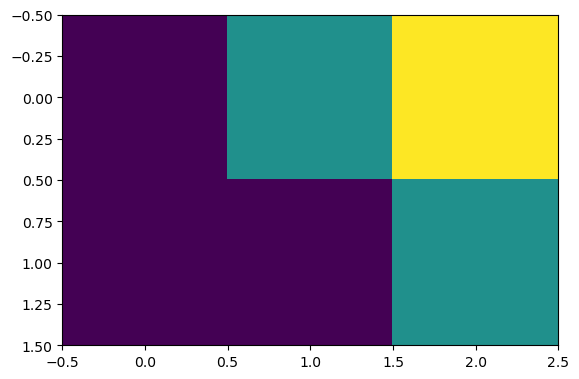

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import json

# file_name = sys.argv[1]
file_name = "output.json"
f = open(file_name)

colors = {
    'a': 0,
    'b': 1,
    'c': 2
}

data = json.load(f)

data = data["Call"][-1]["Witnesses"][-1]["Value"]
data = [[colors[x] for x in el[10:-1].split(",") if x.isalpha()] for el in data if el[0] == 'c']

data = np.array(data).reshape((2, 3))

plt.imshow(data)

In [60]:
class Rule:
    def __init__(self, base, neighbour, dir):
        self.base = base
        self.neighbour = neighbour
        self.dir = dir
    
    def __repr__(self) -> str:
        return f"rule({self.base}, {self.dir}, {self.neighbour})."
    
    def __hash__(self):
        return hash(self.__repr__())
    
    def __eq__(self, other):
        return (isinstance(other, Rule) and
                (self.base == other.base) and 
                (self.neighbour == other.neighbour) and 
                (self.dir == other.dir))

file_name = "input.json"
f = open(file_name)
data = json.load(f)

rules = set()
states = set()

grid = data["pattern"]
height = len(data["pattern"])
width = len(data["pattern"][0])


for i in range(len(grid)):
    for j in range(len(grid[i])):

        states.add(grid[i][j])

        if i - 1 >= 0:
            rules.add(Rule(grid[i][j], grid[i-1][j], "up"))
        if i + 1 < height:
            rules.add(Rule(grid[i][j], grid[i+1][j], "down"))
        if j - 1 >= 0:
            rules.add(Rule(grid[i][j], grid[i][j-1], "left"))
        if j + 1 < width:
            rules.add(Rule(grid[i][j], grid[i][j+1], "right"))
        

f = open(f"{data['file_name']}.lp", "w")


output = "\n".join(map(lambda rule: rule.__repr__(), rules))
output += "\n\n" + "\n".join([f"state({s})." for s in states])
print(output)

f.write(output)
f.close()

rule(a, right, b).
rule(b, up, a).
rule(b, down, c).
rule(b, left, b).
rule(b, up, b).
rule(b, right, c).
rule(a, right, a).
rule(b, down, b).
rule(b, left, a).
rule(a, left, a).
rule(c, left, b).
rule(a, up, a).
rule(a, down, b).
rule(b, right, b).
rule(a, down, a).
rule(c, up, b).

state(a).
state(b).
state(c).
